# **[로지스틱 회귀] 가중치, 편향, 가설 함수, 비용 함수 직접 구현**

### 로지스틱 회귀를 통해 이진 분류 문제 해결

### **가설**
$$ H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b) $$

### **비용 함수**
$$ cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 $$

In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 입력 값
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
# 출력 값
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 가중치
W = torch.zeros((2, 1), requires_grad=True)
# 편향
b = torch.zeros(1, requires_grad=True)
#경사 하강법 중 SGD
optimizer=optim.SGD([W, b], lr=1)


epochs=2000
for epoch in range(1, epochs+1):

  # 가설
  hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))
  # 비용 함수
  cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print(f'{epoch}번 반복. 편향 : {b.item()} 비용 : {cost.item()}')

hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))
print(hypothesis)
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
print(W, b)


100번 반복. 편향 : -6.0003581047058105 비용 : 0.13564401865005493
200번 반복. 편향 : -8.239078521728516 비용 : 0.08096421509981155
300번 반복. 편향 : -9.699679374694824 비용 : 0.058062490075826645
400번 반복. 편향 : -10.788596153259277 비용 : 0.04539801552891731
500번 반복. 편향 : -11.658843040466309 비용 : 0.03732701763510704
600번 반복. 편향 : -12.38460636138916 비용 : 0.03172000125050545
700번 반복. 편향 : -13.007560729980469 비용 : 0.027591748163104057
800번 반복. 편향 : -13.553516387939453 비용 : 0.02442231960594654
900번 반복. 편향 : -14.03958511352539 비용 : 0.02191077172756195
1000번 반복. 편향 : -14.4777193069458 비용 : 0.019870612770318985
1100번 반복. 편향 : -14.876594543457031 비용 : 0.018179964274168015
1200번 반복. 편향 : -15.242709159851074 비용 : 0.016755759716033936
1300번 반복. 편향 : -15.581073760986328 비용 : 0.015539352782070637
1400번 반복. 편향 : -15.895617485046387 비용 : 0.014488295651972294
1500번 반복. 편향 : -16.18951416015625 비용 : 0.013570780865848064
1600번 반복. 편향 : -16.465282440185547 비용 : 0.012763000093400478
1700번 반복. 편향 : -16.72505760192871 비용 : 0.012046

# **[로지스틱 회귀] nn.module 사용**

### 로지스틱 회귀를 통해 이진 분류 문제 해결

### **가설**
$$ H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b) $$

### **비용 함수**
$$ cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 $$

In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 입력 값
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
# 출력 값
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

optimizer=optim.SGD(model.parameters(), lr=1)


epochs=2000
for epoch in range(1, epochs+1):

  # 가설
  hypothesis = model(x_train)
  # 비용 함수
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%10==0:
    prediction = hypothesis > torch.FloatTensor([0.5])
    correct_prediction = prediction.float()==y_train
    print(f'{epoch}번 반복. 편향 : {b.item()} 비용 : {cost.item()} 정확도 : {correct_prediction.sum().item()/len(correct_prediction)}')

hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))
print(hypothesis)
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
print(W, b)


10번 반복. 편향 : -17.4246768951416 비용 : 0.6773098111152649 정확도 : 0.6666666666666666
20번 반복. 편향 : -17.4246768951416 비용 : 0.6290845274925232 정확도 : 0.8333333333333334
30번 반복. 편향 : -17.4246768951416 비용 : 0.5220338702201843 정확도 : 0.8333333333333334
40번 반복. 편향 : -17.4246768951416 비용 : 0.4345872402191162 정확도 : 0.8333333333333334
50번 반복. 편향 : -17.4246768951416 비용 : 0.35128068923950195 정확도 : 0.8333333333333334
60번 반복. 편향 : -17.4246768951416 비용 : 0.2736521065235138 정확도 : 0.8333333333333334
70번 반복. 편향 : -17.4246768951416 비용 : 0.2087664157152176 정확도 : 0.8333333333333334
80번 반복. 편향 : -17.4246768951416 비용 : 0.1676834225654602 정확도 : 1.0
90번 반복. 편향 : -17.4246768951416 비용 : 0.14922919869422913 정확도 : 1.0
100번 반복. 편향 : -17.4246768951416 비용 : 0.13845805823802948 정확도 : 1.0
110번 반복. 편향 : -17.4246768951416 비용 : 0.12942089140415192 정확도 : 1.0
120번 반복. 편향 : -17.4246768951416 비용 : 0.12151431292295456 정확도 : 1.0
130번 반복. 편향 : -17.4246768951416 비용 : 0.11453530192375183 정확도 : 1.0
140번 반복. 편향 : -17.4246768951416 비용 : 0.1

8730
10000
Accuracy: 0.8729999661445618
Label:  5
Prediction:  3


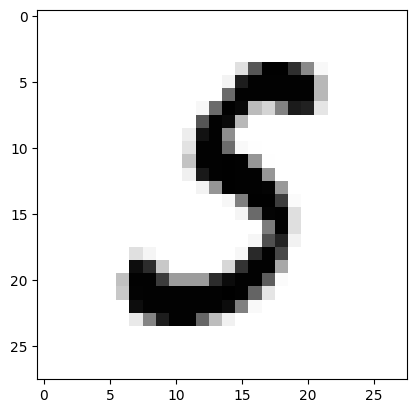

8730
10000
Accuracy: 0.8729999661445618
Label:  5
Prediction:  3


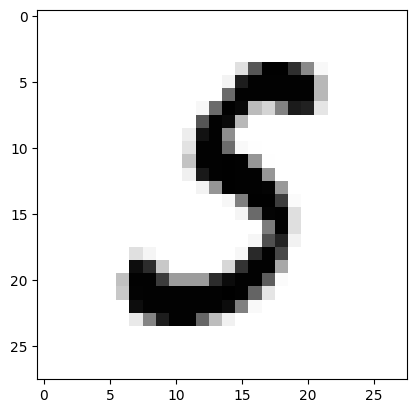